# Binary Classification with a Bank Churn

### План работы

1. Загрузка данных
2. Предварительный анализ
3. Выявление и обработка пропусков
4. Выявление и преобразование категориальных данных
5. Нормирование данных выбранным методом

### Загрузка данных

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
submission = pd.read_csv('data/sample_submission.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


### Предварительный анализ

#### Датафрейм Test

In [ ]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [ ]:
test.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


#### Датафрейм Train

In [ ]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


#### Датафрейм submission

In [ ]:
submission.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      110023 non-null  int64  
 1   Exited  110023 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.7 MB


In [ ]:
submission.describe()

,id,Exited
count,110023.000000,110023.0
mean,220045.000000,0.5
std,31761.048671,0.0
min,165034.000000,0.5
25%,192539.500000,0.5
50%,220045.000000,0.5
75%,247550.500000,0.5
max,275056.000000,0.5


#### Вывод

Проведен предварительный анализ данных. Изучены типы и статистические показатели данных.

#### Выявление и обработка пропусков

In [ ]:
test.isna().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
train.isna().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


#### Вывод

Пропусков нет.

#### Выявление и преобразование категориальных данных

Необходимо преобразовать столбцы gender и geography.



Рассмотрим значения до кодировки



In [ ]:
print(train['Geography'].unique())
print(train['Gender'].unique())
print(test['Geography'].unique())
print(test['Gender'].unique())

['France' 'Spain' 'Germany']
['Male' 'Female']
['France' 'Germany' 'Spain']
['Female' 'Male']


Закодируем значения

In [ ]:
# Кодировка небулевых категориальных значений
label_encoder = LabelEncoder()
train['Geography'] = label_encoder.fit_transform(train['Geography'])
train['Gender'] = label_encoder.fit_transform(train['Gender'])
test['Geography'] = label_encoder.fit_transform(test['Geography'])
test['Gender'] = label_encoder.fit_transform(test['Gender'])

Рассмотрим значения после кодировки

In [ ]:
print(train['Geography'].unique())
print(train['Gender'].unique())
print(test['Geography'].unique())
print(test['Gender'].unique())

[0 2 1]
[1 0]
[0 1 2]
[0 1]


#### Вывод

Выбранные значения успешно закодированы.

#### Нормирование данных

Рассмотрим статистическое описание тренировочной выборки

In [ ]:
train.describe()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,0.648545,0.564429,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,0.816574,0.495833,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,0.000000,1.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,1.000000,1.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Рассмотрим статистическое описание тестовой выборки

In [ ]:
test.describe()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,0.643184,0.562991,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,0.814982,0.496018,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,0.000000,1.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,1.000000,1.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


**Необходимо нормировать следующие столбцы:**

- CreditScore - значения варьируются в диапазоне от 350 до 850
- Age - значения варьируются в диапазоне от 18 до 92.
- Balance - значения варьируются от 0 до 250,898. 50% перцентиль равен 0.
- EstimatedSalary - значения варьируются от 11 до 199,992.

Рассмотрим распределение выбранных признаков для тренировочной выборки

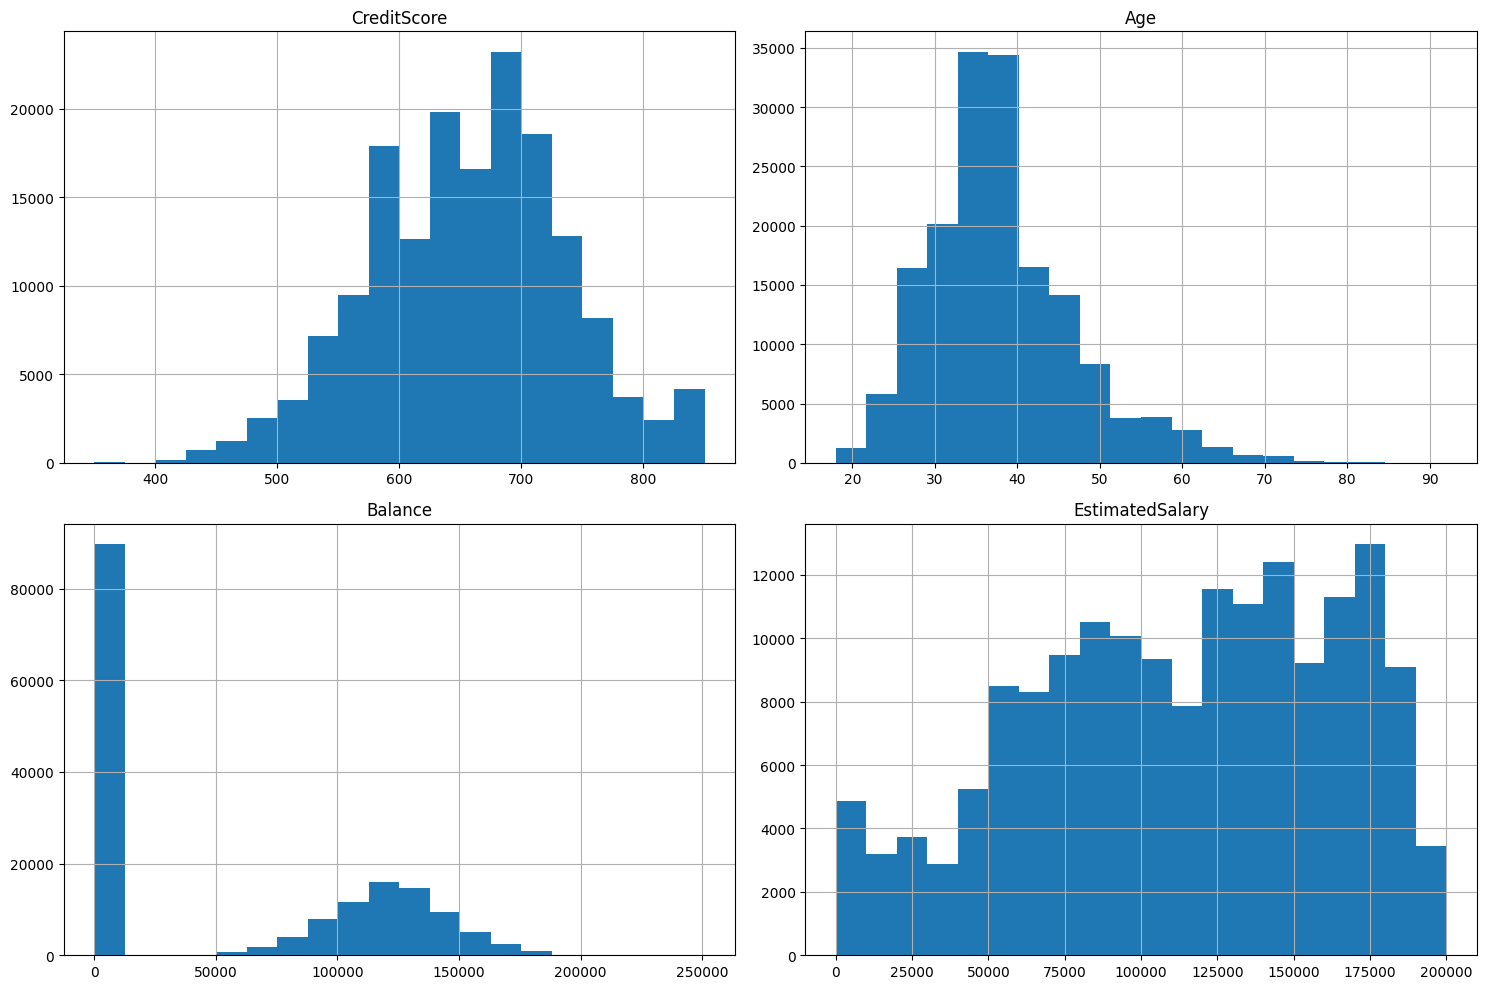

In [ ]:
cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
train[cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

Рассмотрим распределение выбранных признаков для тестовой выборки

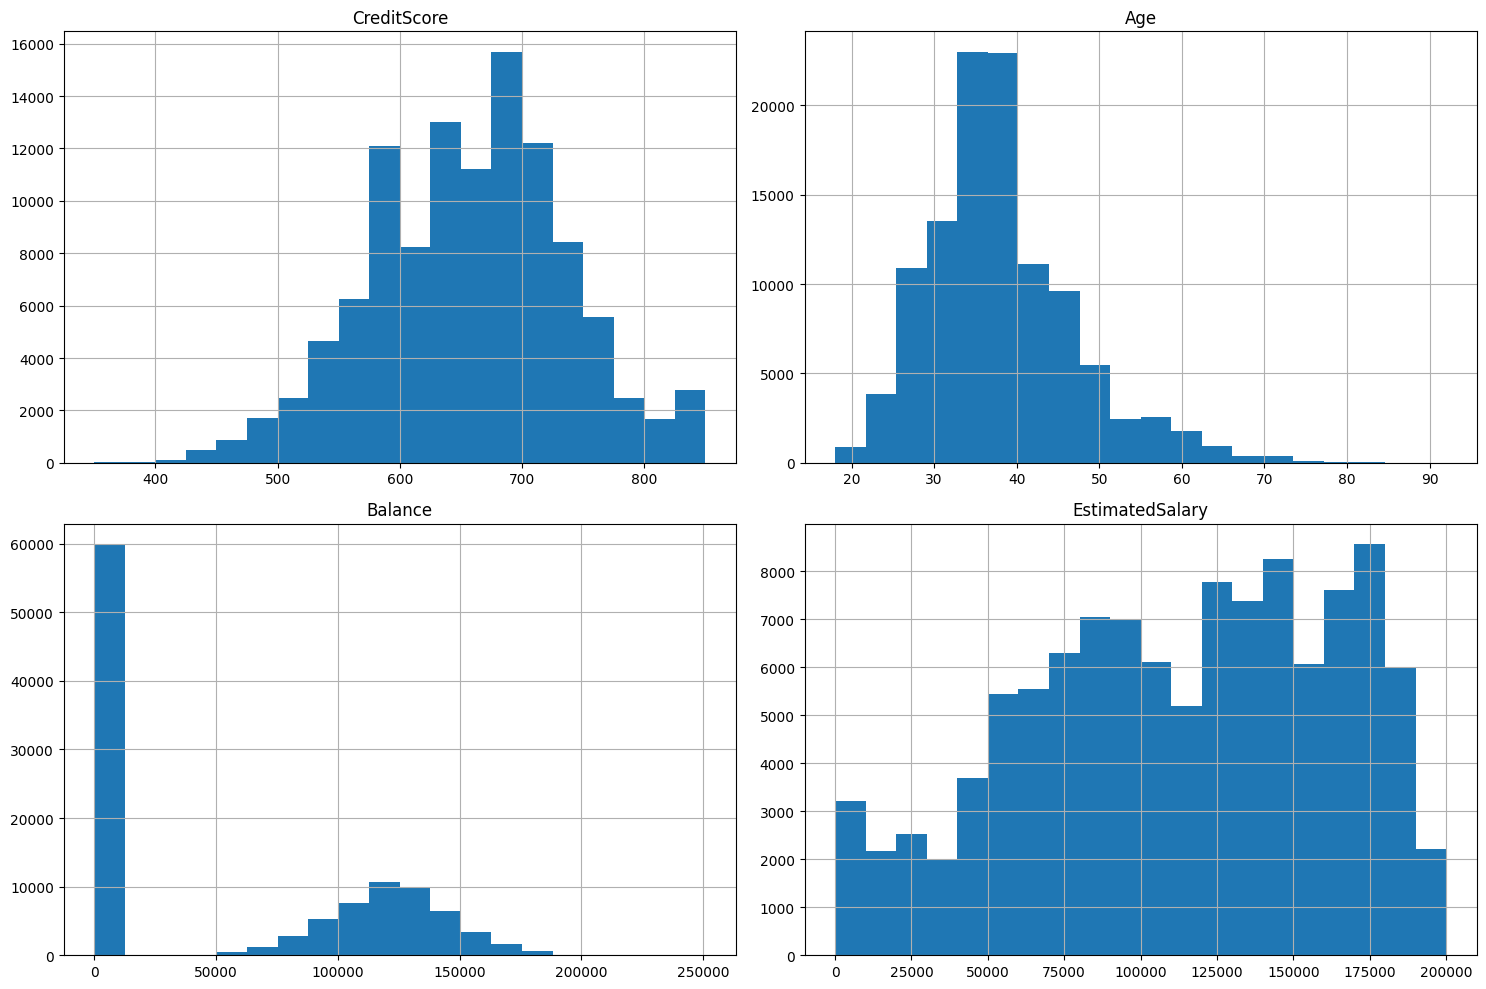

In [ ]:
test[cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

**Метод нормализации:**

- CreditScore - распределение близко к нормальному, поэтому стоит выбрать Z-score нормализацию
- Balance - необходимо применить robust scaler, потому что он устойчив к выбросам.
- Age, EstimatedSalary - min-max нормализация

**Нормализация CreditScore**

In [ ]:
scaler = MinMaxScaler()

train['CreditScore'] = scaler.fit_transform(train[['CreditScore']])

test['CreditScore'] = scaler.transform(test[['CreditScore']])

**Нормализация Age, EstimatedSalary**

In [ ]:
scaler = MinMaxScaler()

cols = ['Age', 'EstimatedSalary']

train[cols] = scaler.fit_transform(train[cols])

test[cols] = scaler.transform(test[cols])

**Нормализация Balance**

In [ ]:
scaler = RobustScaler()

train['Balance'] = scaler.fit_transform(train[['Balance']])

test['Balance'] = scaler.transform(test[['Balance']])

In [ ]:
train.describe()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,0.612909,0.648545,0.564429,0.271971,5.020353,0.462551,1.554455,0.753954,0.497770,0.562870,0.211599
std,47641.3565,7.139782e+04,0.160207,0.816574,0.495833,0.119827,2.806159,0.523745,0.547154,0.430707,0.499997,0.251488,0.408443
min,0.0000,1.556570e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,41258.2500,1.563314e+07,0.494000,0.000000,0.000000,0.189189,3.000000,0.000000,1.000000,1.000000,0.000000,0.373166,0.000000
50%,82516.5000,1.569017e+07,0.618000,0.000000,1.000000,0.256757,5.000000,0.000000,2.000000,1.000000,0.000000,0.589738,0.000000
75%,123774.7500,1.575682e+07,0.720000,1.000000,1.000000,0.324324,7.000000,1.000000,2.000000,1.000000,1.000000,0.775779,0.000000
max,165033.0000,1.581569e+07,1.000000,2.000000,1.000000,1.000000,10.000000,2.091872,4.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test.describe()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,0.613062,0.643184,0.562991,0.271922,4.996637,0.461346,1.553321,0.753043,0.495233,0.561571
std,31761.048671,7.168499e+04,0.160631,0.814982,0.496018,0.119751,2.806148,0.523502,0.544714,0.431244,0.499980,0.251409
min,165034.000000,1.556570e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,192539.500000,1.563286e+07,0.494000,0.000000,0.000000,0.189189,3.000000,0.000000,1.000000,1.000000,0.000000,0.372179
50%,220045.000000,1.569018e+07,0.620000,0.000000,1.000000,0.256757,5.000000,0.000000,2.000000,1.000000,0.000000,0.589160
75%,247550.500000,1.575693e+07,0.720000,1.000000,1.000000,0.324324,7.000000,1.001718,2.000000,1.000000,1.000000,0.773173
max,275056.000000,1.581569e+07,1.000000,2.000000,1.000000,1.000000,10.000000,2.091872,4.000000,1.000000,1.000000,1.000000


#### Вывод

Данные корректно нормализованы.

### Инжиниринг признаков

1. Balance_to_Age_Ratio: Соотношение баланса и
возраста для определения благосостояния в разных возрастных группах.

2. Products_per_Year: Среднее количество товаров, продаваемых в течение года, для оценки вовлеченности в продукт.

In [ ]:
train['Balance_to_Age_Ratio'] = (train['Balance']) / (train['Age'] + 1e-5)
train['Products_per_Year'] = train['NumOfProducts'] / (train['Tenure'] + 1e-5)

test['Balance_to_Age_Ratio'] = test['Balance'] / (test['Age'] + 1e-5)
test['Products_per_Year'] = test['NumOfProducts'] / (test['Tenure'] + 1e-5)

print("После добавления новых признаков в train:\n", train.columns)
print("После добавления новых признаков в test:\n", test.columns)

test.to_csv('test_2.csv', index = True)

После добавления новых признаков в train:
 Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Balance_to_Age_Ratio',
       'Products_per_Year'],
      dtype='object')
После добавления новых признаков в test:
 Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Balance_to_Age_Ratio',
       'Products_per_Year'],
      dtype='object')


## Логистическая регрессия


#### Метод инициализации параметров и метод обучения модели

In [ ]:
# Класс логистической регрессии
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        # Метод инициализации параметров модели логистической регрессии
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        # Метод для вычисления сигмоидной функции
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, n_features):
        # Метод инициализации весов и смещения нулями
        self.weights = np.zeros(n_features)
        self.bias = 0

    def compute_cost(self, y_true, y_pred):
        # Метод вычисления функции потерь
        m = y_true.shape[0]
        cost = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return cost

    def train(self, X, y):
        # Метод обучения модели логистической регрессии
        m, n = X.shape

        # Метод инициализации параметров
        self.initialize_parameters(n)

        for epoch in range(self.epochs):
            # Вычисление линейной комбинации входных данных и весов
            z = np.dot(X, self.weights) + self.bias

            # Применение сигмоидной функции для получения предсказанных вероятностей
            y_pred = self.sigmoid(z)

            # Вычисление градиентов
            dw = 1/m * np.dot(X.T, (y_pred - y))
            db = 1/m * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if epoch % 100 == 0:
                cost = self.compute_cost(y, y_pred)
                print(f"Epoc {epoch}, Losses: {cost}")

    def predict(self, X):
        # Метод предсказания меток для входных данных
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return (y_pred >= 0.5).astype(int)

### Предсказание

In [ ]:
import numpy as np
import pandas as pd

if __name__ == "__main__":

    # Удаление неинформативных колонок
    columns_to_drop = ['id', 'CustomerId', 'Surname']  # Список колонок для удаления
    train = train.drop(columns=columns_to_drop)
    test = test.drop(columns=columns_to_drop)

    # Разделение данных на признаки и целевую переменную
    X_train = train.drop(columns=['Exited'])
    y_train = train['Exited']

    X_test = test.copy()

    # Метод обучения модели
    model = LogisticRegression(learning_rate=0.01, epochs=1000)
    model.train(X_train.values, y_train.values)

    # Метод предсказания на тестовых данных
    y_pred = model.predict(X_test.values)

    # Сохранение предсказаний
    predictions = pd.DataFrame({'id': test.index, 'Exited': y_pred})

Epoc 0, Losses: 0.6931471805599453


<ipython-input-27-ed15e9f3cb77>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-27-ed15e9f3cb77>:22: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
<ipython-input-27-ed15e9f3cb77>:22: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


Epoc 100, Losses: nan
Epoc 200, Losses: nan
Epoc 300, Losses: nan
Epoc 400, Losses: nan
Epoc 500, Losses: nan
Epoc 600, Losses: nan
Epoc 700, Losses: nan
Epoc 800, Losses: nan
Epoc 900, Losses: nan


#### Файл с предсказанием

In [ ]:
predictions.head(30)

,id,Exited
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


### Метод оценки метрик recall, precision, f1


Для реализации методов оценки метрик recall, precision, f1 нам понадобятся значения:

**TP (True Positive):** количество правильно классифицированных положительных примеров.

**FP (False Positive):** количество ошибочно классифицированных положительных примеров.

**FN (False Negative):** количество положительных примеров, которые классифицированы как отрицательные.



**Формулы для метрик:**

1. *Precision (Точность):*
частное от деления TP на сумму TP и FP

2. *Recall (Полнота):*
частное от деления TP на сумму TP и FN

3. *F1 (Гармоническое среднее):*
частное от деления произведения precision и recall на сумму precision и recall


Для начала добавим столбцы y_true и y_pred в датафрейм train.

In [ ]:
train = pd.read_csv('data/train.csv')

def add_columns_with_adjustment(train, y_true, y_pred):

    train_length = len(train)
    y_true_length = len(y_true)
    y_pred_length = len(y_pred)

    if y_true_length != train_length:
        y_true = y_true[:train_length] + [np.nan] * (train_length - y_true_length)
    if y_pred_length != train_length:
        y_pred =  list(y_pred) + [np.nan] * (train_length - y_pred_length)

    train['y_true'] = y_true
    train['y_pred'] = y_pred
    return train

train_new = add_columns_with_adjustment(train, y_true, y_pred)
print(train_new)

NameError: name 'y_true' is not defined

Далее добавим столбцы y_true и y_pred в датафрейм test.

In [ ]:
test = pd.read_csv('/content/test.csv')

def add_columns_with_adjustment(test, y_true, y_pred):

    test_length = len(test)
    y_true_length = len(y_true)
    y_pred_length = len(y_pred)

    if y_true_length != test_length:
        y_true = y_true[:test_length] + [np.nan] * (test_length - y_true_length)
    if y_pred_length != test_length:
        y_pred = y_pred[:test_length] + [np.nan] * (test_length - y_pred_length)

    test['y_true'] = y_true
    test['y_pred'] = y_pred
    return test

test_new = add_columns_with_adjustment(test, y_true, y_pred)
print(test_new)

NameError: name 'y_true' is not defined

Далее вычисляем метрики recall, precision, f1 и необходимые для них значения TP (True Positive), FP (False Positive) и FN (False Negative) на датафрейме train_new.

In [ ]:
import pandas as pd

def calculate_metrics_pandas(train_new):
    assert 'y_true' in train_new.columns and 'y_pred' in train_new.columns, "DataFrame должен содержать колонки 'y_true' и 'y_pred'"

    # Вычисление TP, FP, FN
    TP = len(train_new[(train_new['y_true'] == 1) & (train_new['y_pred'] == 1)])
    FP = len(train_new[(train_new['y_true'] == 0) & (train_new['y_pred'] == 1)])
    FN = len(train_new[(train_new['y_true'] == 1) & (train_new['y_pred'] == 0)])

    # Метрики
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    return {"precision": precision, "recall": recall, "f1": f1}

metrics = calculate_metrics_pandas(train_new)
print(metrics)

NameError: name 'train_new' is not defined

Теперь вычислим метрики recall, precision, f1 и необходимые для них значения TP (True Positive), FP (False Positive) и FN (False Negative) на датафрейме test_new.

In [ ]:
import pandas as pd

def calculate_metrics_pandas(test_new):
    assert 'y_true' in test_new.columns and 'y_pred' in test_new.columns, "DataFrame должен содержать колонки 'y_true' и 'y_pred'"

    # Вычисление TP, FP, FN
    TP = len(test_new[(test_new['y_true'] == 1) & (test_new['y_pred'] == 1)])
    FP = len(test_new[(test_new['y_true'] == 0) & (test_new['y_pred'] == 1)])
    FN = len(test_new[(test_new['y_true'] == 1) & (test_new['y_pred'] == 0)])

    # Метрики
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    return {"precision": precision, "recall": recall, "f1": f1}

metrics = calculate_metrics_pandas(test_new)
print(metrics)

NameError: name 'test_new' is not defined

## Линейная регрессия


In [ ]:
class LinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # Используем нормальное уравнение для вычисления коэффициентов
        self.coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept = self.coefficients[0]
        self.coefficients = self.coefficients[1:]

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(np.r_[self.intercept, self.coefficients])

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r_squared(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)



## Бейзлайн модель на необработанных данных


In [ ]:
train_raw = pd.read_csv('data/train.csv')
test_raw = pd.read_csv('data/test.csv')

X_train_raw = train_raw[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography', 'Gender']]
y_train_raw = train_raw['Exited']

X_test_raw = test_raw[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography', 'Gender']]

# Кодировка
X_train_raw = pd.get_dummies(X_train_raw, columns=['Geography', 'Gender'], drop_first=True)
X_test_raw = pd.get_dummies(X_test_raw, columns=['Geography', 'Gender'], drop_first=True)

# Обучение модели
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train_raw, y_train_raw)

# Предсказания
y_pred_raw = baseline_model.predict(X_test_raw)

# Оценка метрик
print("Метрики для необработанных данных:")
print(classification_report(y_train_raw[:len(y_pred_raw)], y_pred_raw))

Метрики для необработанных данных:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82     86832
           1       0.22      0.16      0.18     23191

    accuracy                           0.70    110023
   macro avg       0.50      0.50      0.50    110023
weighted avg       0.67      0.70      0.68    110023



##Бейзлайн модель на обработанных данных

In [ ]:
X_train_processed = train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Balance_to_Age_Ratio', 'Products_per_Year']]
X_test_processed = test[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Balance_to_Age_Ratio', 'Products_per_Year']]
y_train_processed = train['Exited']

# Обучение модели
processed_model = RandomForestClassifier(random_state=42)
processed_model.fit(X_train_processed, y_train_processed)

# Предсказания
y_pred_processed = processed_model.predict(X_test_processed)

# Оценка метрик
print("Метрики для обработанных данных:")
print(classification_report(y_train_processed[:len(y_pred_processed)], y_pred_processed))


Метрики для обработанных данных:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     86832
           1       0.21      0.15      0.18     23191

    accuracy                           0.70    110023
   macro avg       0.50      0.50      0.50    110023
weighted avg       0.67      0.70      0.68    110023




## Методы по определению выбросов данных

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

data_for_dbscan = train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Balance_to_Age_Ratio', 'Products_per_Year']].values  # выберите нужные столбцы

# Настройка DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data_for_dbscan)

# Определение выбросов
outliers_dbscan = train[labels == -1]
print(outliers_dbscan)


        CreditScore  Geography  Gender       Age  Tenure   Balance  \
42            0.668          1       0  0.175676       3  1.186377   
51            0.522          0       1  0.094595       7  1.095090   
76            0.468          1       1  0.108108       1  1.063368   
87            0.850          0       0  0.027027       6  0.909013   
109           0.406          1       0  0.040541       3  1.146855   
...             ...        ...     ...       ...     ...       ...   
164815        0.606          0       0  0.094595       4  1.233994   
164961        0.712          2       1  0.040541       9  1.106209   
164969        0.486          1       1  0.040541       2  0.840271   
164994        0.442          1       1  0.324324       4  0.990741   
165016        0.222          0       1  0.081081       3  0.978930   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
42                  3        1.0             0.0         0.733265       1   
51   

In [ ]:
# оценим с помощью метрики силуэт

from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score

data_for_dbscan = train[['Age']].values
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data_for_dbscan)
silhouette_score(data_for_dbscan, labels)

0.9999525836479436

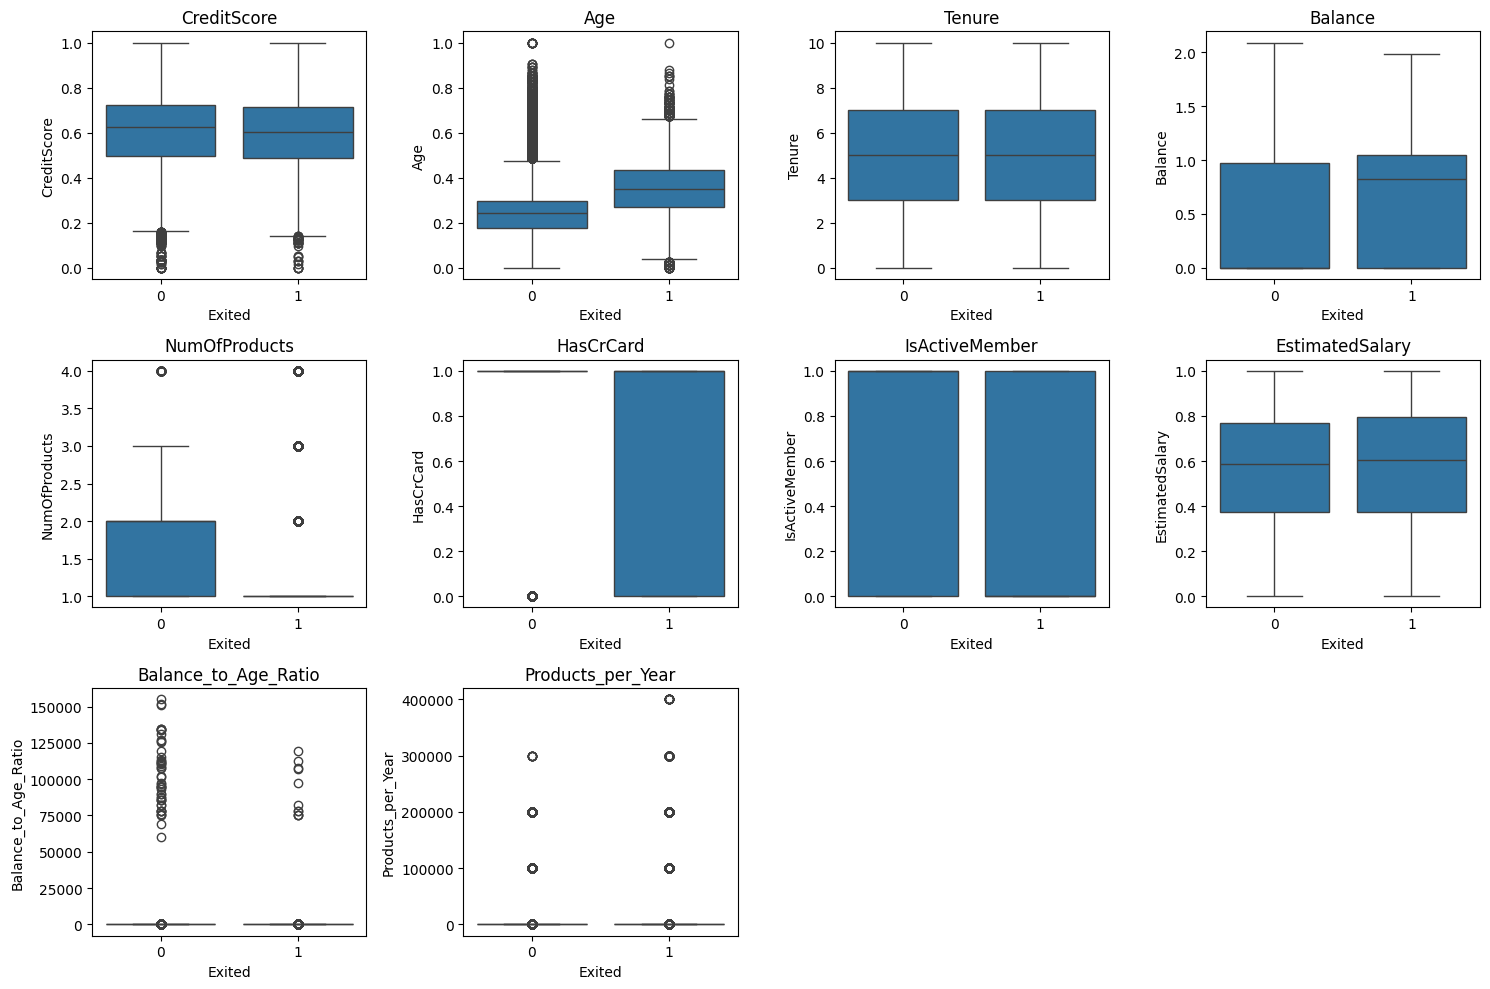

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 10))

# Создаем ящики с усами для каждого признака
for i, column in enumerate(X_train_processed.columns):
    plt.subplot(3, 4, i + 1)  # 3 строки, 4 столбца
    sns.boxplot(x=y_train_processed, y=X_train_processed[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Выбросы присутствуют в следующих признаках: CreditScore, Age, NumOfProducts, HasCrCard

### Определить возможность применения статистического подхода по поиску выбросов

Для поиска выбросов применим статистический метод IQR. Значение является выбросом, если её значение превышает 1,5 раз ниже IQR первого квартиля или 1,5 раз выше третьего квартиля IQR.

In [ ]:
# Выделим числовые признаки
numerical_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Balance_to_Age_Ratio", "Products_per_Year"]
# Расчет IQR и удаление выбросов
def outliers(data, features):
    data_cleaned = data.copy()
    for col in features:
        Q1 = data_cleaned[col].quantile(0.25)
        Q3 = data_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Удаляем строки с выбросами
        data_cleaned = data_cleaned[data_cleaned[col].between(lower_bound, upper_bound)]
    return data_cleaned

train_cleaned = outliers(train, numerical_columns)

train_cleaned

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_to_Age_Ratio,Products_per_Year
0,0,15674932,Okwudilichukwu,0.636,0,1,0.202703,3,0.000000,2,1.0,0.0,0.907279,0,0.000000,0.666664
2,2,15694510,Hsueh,0.656,0,1,0.297297,10,0.000000,2,1.0,0.0,0.924364,0,0.000000,0.200000
3,3,15741417,Kao,0.462,0,1,0.216216,2,1.241313,1,1.0,1.0,0.422787,0,5.740809,0.499998
4,4,15766172,Chiemenam,0.732,2,1,0.202703,5,0.000000,2,1.0,1.0,0.075293,0,0.000000,0.399999
5,5,15771669,Genovese,0.476,1,1,0.243243,4,1.098709,1,1.0,0.0,0.680129,1,4.516727,0.249999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165027,165027,15703793,Bevan,0.834,0,0,0.351351,4,0.638272,2,1.0,0.0,0.389167,0,1.816569,0.499999
165028,165028,15704770,Oluchukwu,0.560,0,1,0.432432,8,0.000000,2,1.0,1.0,0.029757,0,0.000000,0.250000
165029,165029,15667085,Meng,0.634,2,0,0.202703,2,0.000000,1,1.0,1.0,0.659179,0,0.000000,0.499998
165031,165031,15664752,Hsia,0.430,0,1,0.175676,5,0.000000,1,1.0,1.0,0.637151,0,0.000000,0.200000


In [ ]:
# Выделим числовые признаки
numerical_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Balance_to_Age_Ratio", "Products_per_Year"]

test_cleaned = outliers(test, numerical_columns)

test_cleaned

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Balance_to_Age_Ratio,Products_per_Year
1,165035,15782418,Nott,0.666,0,0,0.378378,2,0.000000,1,1.0,0.0,0.362723,0.000000,0.499998
2,165036,15807120,K?,0.612,0,0,0.216216,7,0.000000,2,1.0,0.0,0.694419,0.000000,0.285714
3,165037,15808905,O'Donnell,0.662,0,1,0.243243,8,0.000000,1,1.0,0.0,0.569654,0.000000,0.125000
4,165038,15607314,Higgins,0.804,1,1,0.270270,10,1.011040,1,1.0,0.0,0.697164,3.740709,0.100000
6,165040,15647838,Onyemere,0.664,2,1,0.364865,4,0.000000,2,1.0,1.0,0.789411,0.000000,0.499999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,0.440,2,1,0.148649,7,0.967986,1,1.0,1.0,0.740451,6.511470,0.142857
110019,275053,15774133,Cox,0.450,0,0,0.243243,4,1.484353,1,1.0,1.0,0.210871,6.102087,0.249999
110020,275054,15728456,Ch'iu,0.724,0,1,0.175676,2,0.000000,2,1.0,0.0,0.081387,0.000000,0.999995
110021,275055,15687541,Yegorova,0.718,0,0,0.189189,3,0.000000,1,1.0,1.0,0.794101,0.000000,0.333332


Выбросы найдены с помощью статистического метод IQR и удалены из датафрейма